In [650]:
from abc import ABC, abstractmethod
from functools import lru_cache
import random
from sympy import symbols, diff, exp, log, sin, Max, sign
from sympy import lambdify
import matplotlib.pyplot as mpl
import numpy as np

In [637]:
x = symbols('x')

f = x ** 2

def plot_f(f, x_min, x_max):
    print(f"Plotting function: {f}")
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = list(map(lambdify(x, f, modules=['numpy']), x_vals))
    mpl.plot(x_vals, y_vals)

def dx(f, *args, **kwargs):
    return diff(f, *args, **kwargs)

def mul_dx(f, *args, **kwargs):
    return exp(dx(log(f), *args, **kwargs))

def plot_all(f, x_min=-2, x_max=2, y_lim=None):
    mpl.figure(figsize=(20, 10))
    
    dx_f = dx(f)
    mul_dx_f = mul_dx(f)
    
    plot_f(f, x_min, x_max)
    plot_f(dx_f, x_min, x_max)
    plot_f(mul_dx_f, x_min, x_max)

    mpl.legend([f"f(x)={f}", f"d/dx f(x)={dx_f}", f"u/ux f(x)={mul_dx_f}"])
    mpl.xlabel("x")
    mpl.ylabel("y")
    mpl.grid()
    if y_lim is not None:
        mpl.ylim(*y_lim)
    mpl.show()

# Plot some multiplicative derivatives

Plotting function: exp(x**2)
Plotting function: 2*x*exp(x**2)
Plotting function: exp(2*x)


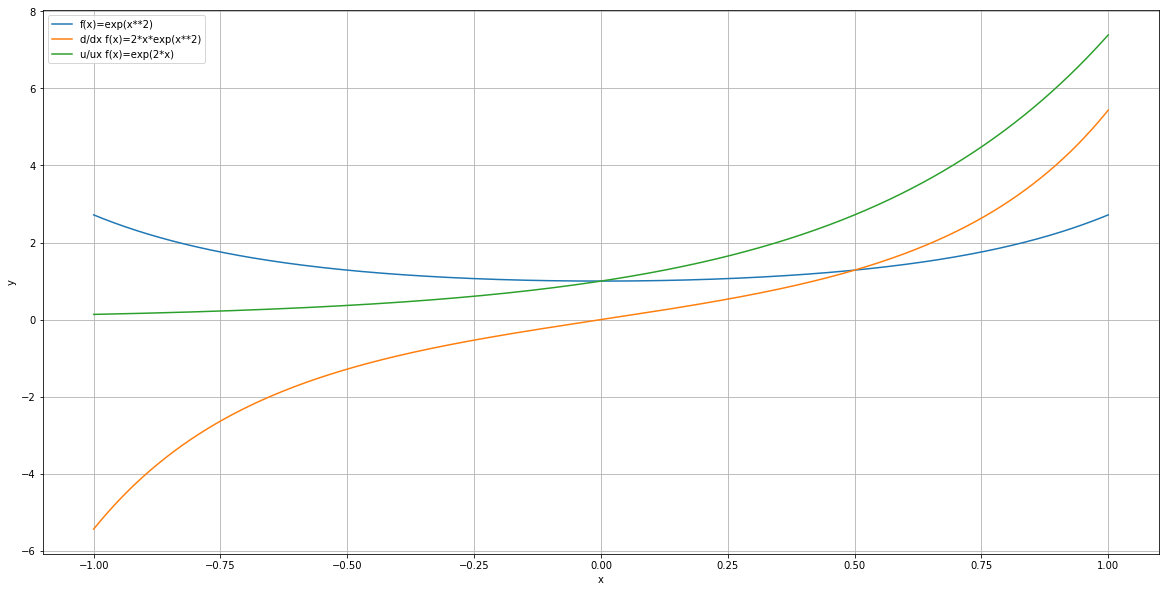

In [638]:
plot_all(f=exp(x**2), x_min=-1, x_max=1)

Plotting function: x**2 + 1
Plotting function: 2*x
Plotting function: exp(2*x/(x**2 + 1))


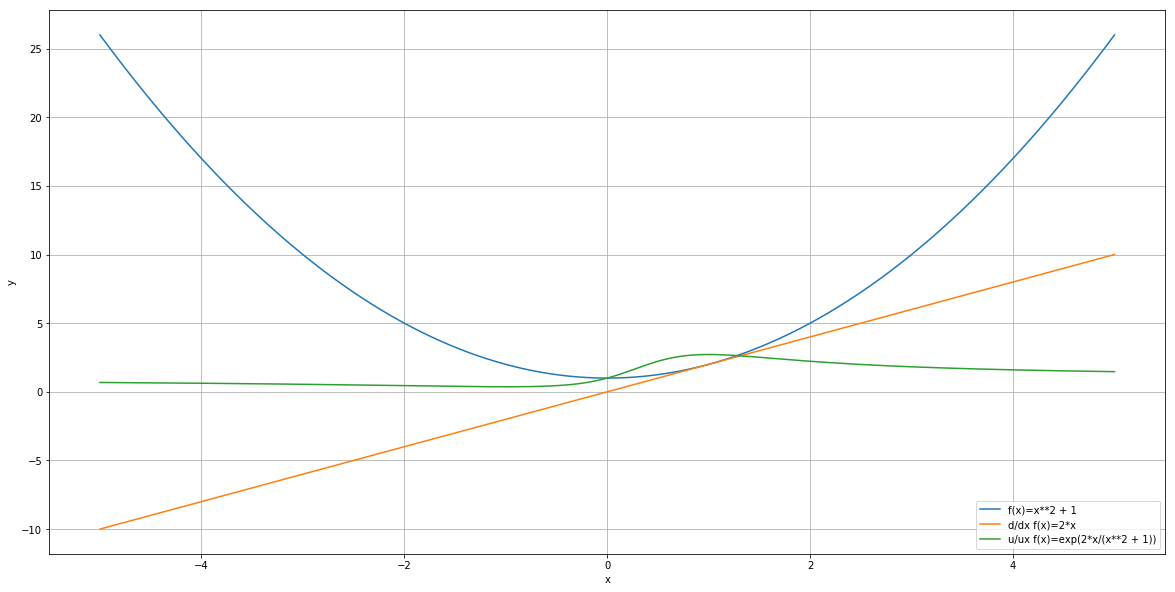

In [639]:
plot_all(f=x**2+1, x_min=-5, x_max=5)

Plotting function: 2**x
Plotting function: 2**x*log(2)
Plotting function: 2


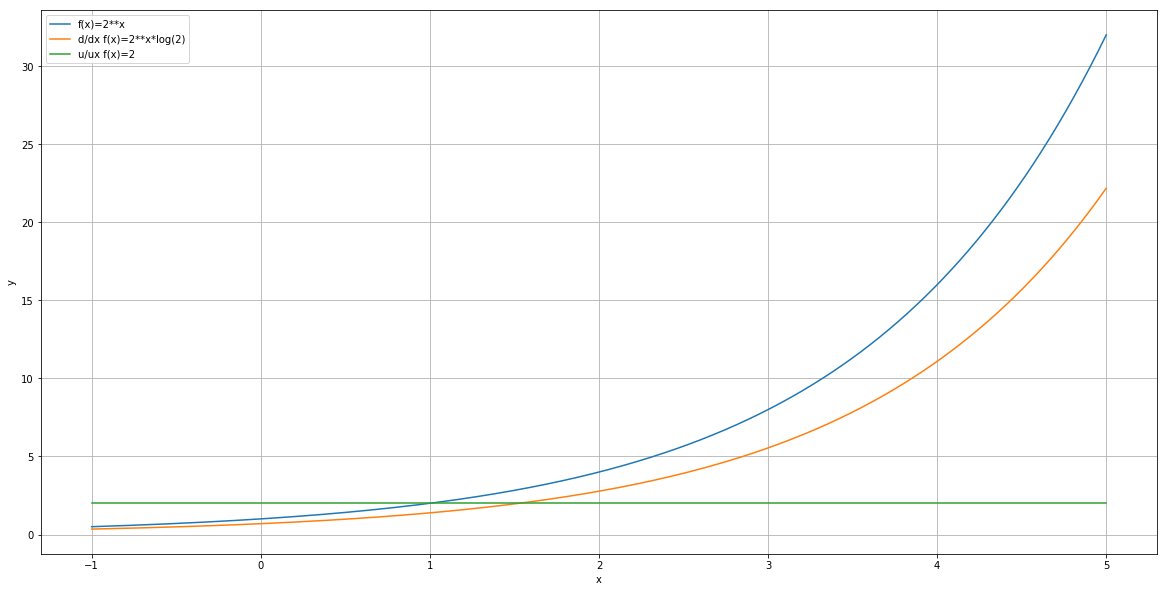

In [640]:
plot_all(f=2**x, x_min=-1, x_max=5)

Plotting function: x
Plotting function: 1
Plotting function: exp(1/x)


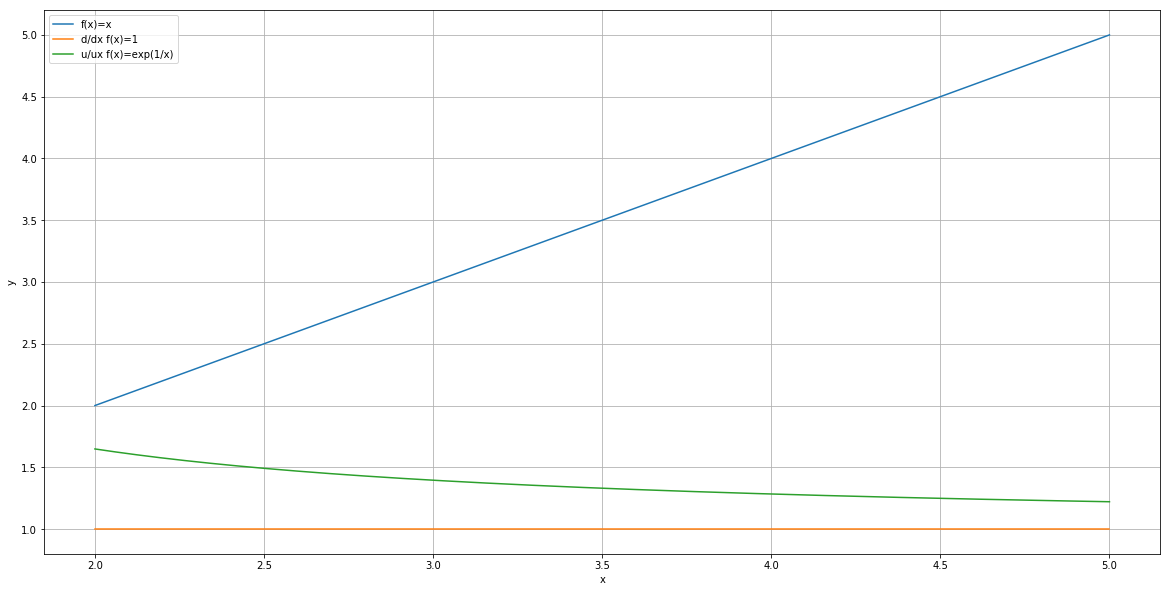

In [641]:
plot_all(f=x, x_min=2, x_max=5)

Plotting function: exp(x)
Plotting function: exp(x)
Plotting function: E


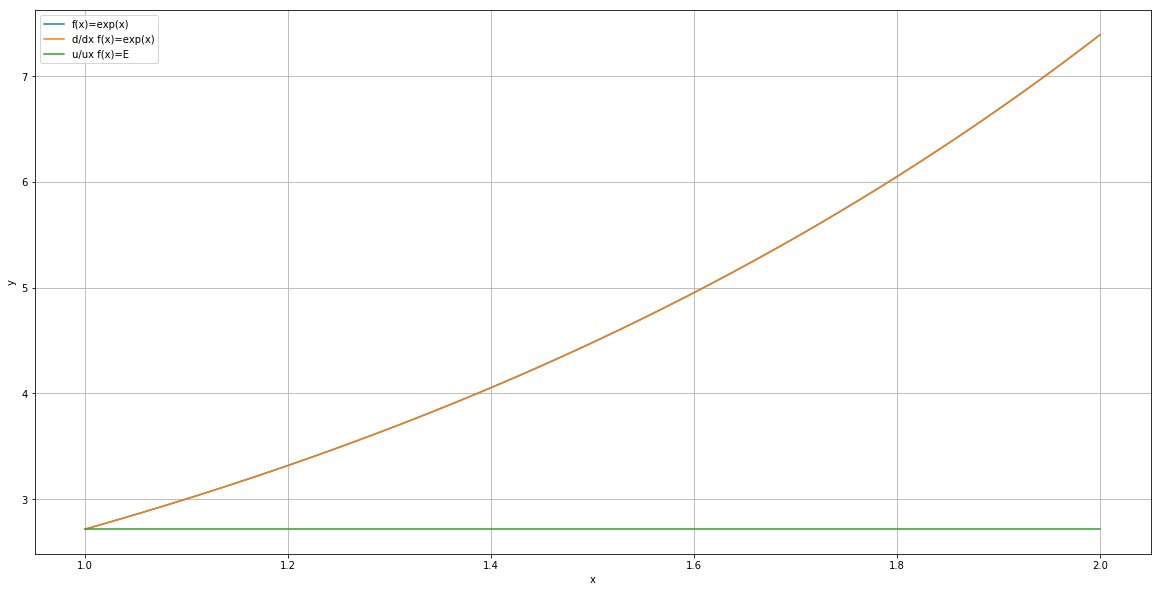

In [642]:
plot_all(f=exp(x), x_min=1, x_max=2)

# Minimize a function (or so)

In [643]:
def minimize(f, x0, n=5, y_lim=None, learning_rate=lambda n, x_curr: 1):
    dx_f = dx(f)
    mul_dx_f = mul_dx(f)
    c_f = lambdify(x, f, modules=['numpy'])
    c_mul_dx_f = lambdify(x, mul_dx_f, modules=['numpy'])
    
    def print_x(x, i):
        mpl.text(x, c_f(x), str(i), fontsize=20)
    
    x_minimizing = [(x0, 0)]
    x_curr = x0
    for i in range(1, n):
        x_curr = x_curr / (c_mul_dx_f(x_curr) ** learning_rate(n, x_curr))
        x_minimizing.append((x_curr, i))
    
    x_min = min(x for x, i in x_minimizing)
    x_max = max(x for x, i in x_minimizing)
    x_delta = x_max - x_min
    x_min -= 0.1 * x_delta
    x_max += 0.1 * x_delta

    mpl.figure(figsize=(20, 10))
    
    plot_f(f, x_min, x_max)
    plot_f(dx_f, x_min, x_max)
    plot_f(mul_dx_f, x_min, x_max)
    
    for xi, i in x_minimizing:
        print_x(xi, i)
    print(x_minimizing)

    mpl.legend([f"f(x)={f}", f"d/dx f(x)={dx_f}", f"u/ux f(x)={mul_dx_f}"])
    mpl.xlabel("x")
    mpl.ylabel("y")
    mpl.grid()
    if y_lim is not None:
        mpl.ylim(*y_lim)
    mpl.show()

Plotting function: 2**((x - 1)**2)
Plotting function: 2**((x - 1)**2)*(2*x - 2)*log(2)
Plotting function: exp((2*x - 2)*log(2))
[(2.777, 0), (0.23643691013728968, 1), (0.6814375517661573, 2), (1.059789877925214, 3), (0.9754896679497905, 4), (1.0092049317782203, 5), (0.9964085443338083, 6), (1.0013818481854857, 7), (0.9994653889199132, 8), (1.0002063955868123, 9)]


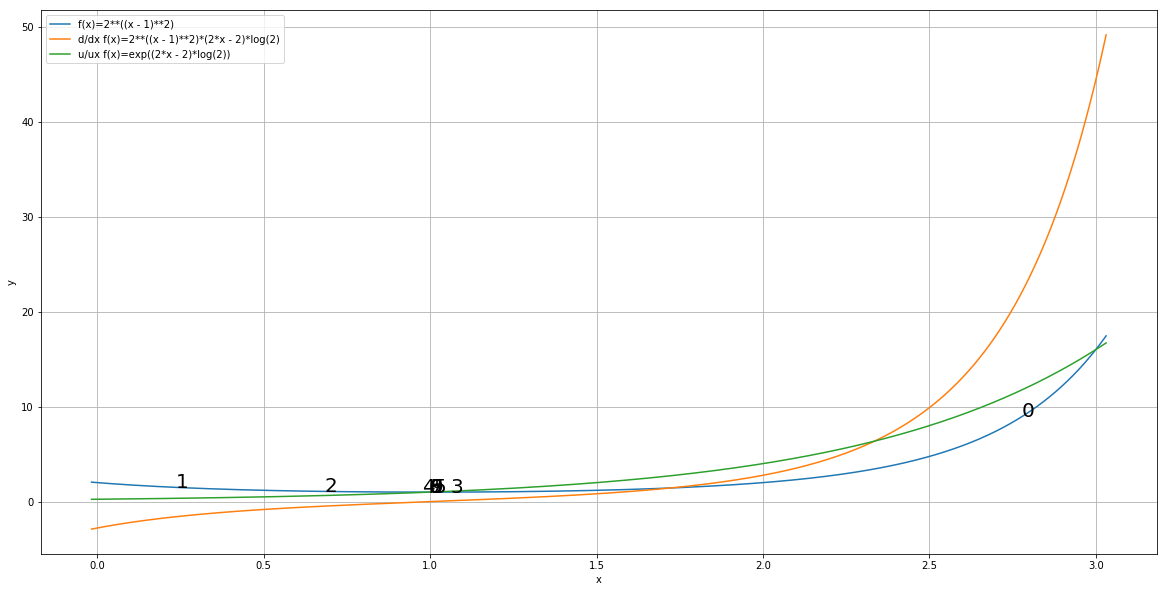

In [644]:
minimize(2**((x-1)**2), 2.777, n=10)

Plotting function: 2**(x + 1)
Plotting function: 2**(x + 1)*log(2)
Plotting function: exp(2**(-x - 1)*2**(x + 1)*log(2))
[(2.777, 0), (1.3885, 1), (0.69425, 2), (0.3471250000000001, 3), (0.17356250000000004, 4), (0.08678125000000002, 5), (0.04339062500000001, 6), (0.021695312500000005, 7), (0.010847656250000002, 8), (0.005423828125000002, 9), (0.002711914062500001, 10), (0.0013559570312500005, 11), (0.0006779785156250002, 12), (0.0003389892578125001, 13), (0.00016949462890625006, 14), (8.474731445312503e-05, 15), (4.2373657226562516e-05, 16), (2.1186828613281258e-05, 17), (1.059341430664063e-05, 18), (5.296707153320315e-06, 19)]


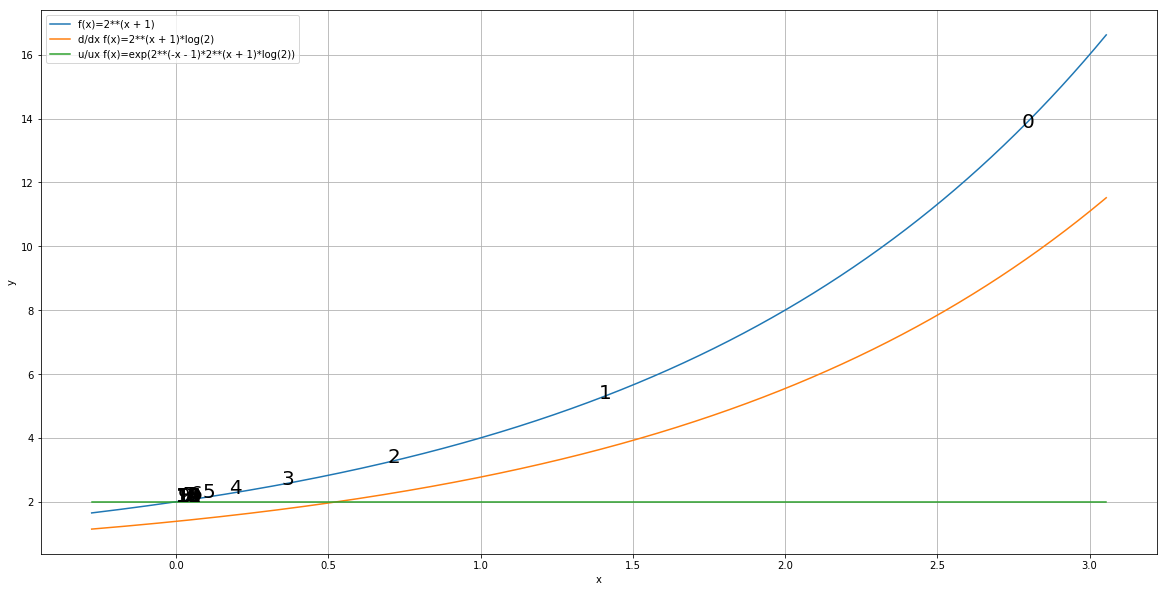

In [645]:
minimize(2**(x+1), 2.777, n=20)

<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: overflow encountered in exp


Plotting function: sin(x)
Plotting function: cos(x)
Plotting function: exp(cos(x)/sin(x))
[(2.777, 0), (38.15041144585938, 1), (4.846369517914966, 2), (5.545672494550606, 3), (16.671256719766042, 4), (8.318464572230443, 5), (13.729163449982984, 6), (8.910788091566193, 7), (52.3735063475398, 8), (95.01816732799875, 9), (33.90584451215335, 10), (125.7707307413717, 11), (0.011407507004596657, 12), (9.72534554994608e-41, 13), (0.0, 14), (0.0, 15), (0.0, 16), (0.0, 17), (0.0, 18), (0.0, 19)]


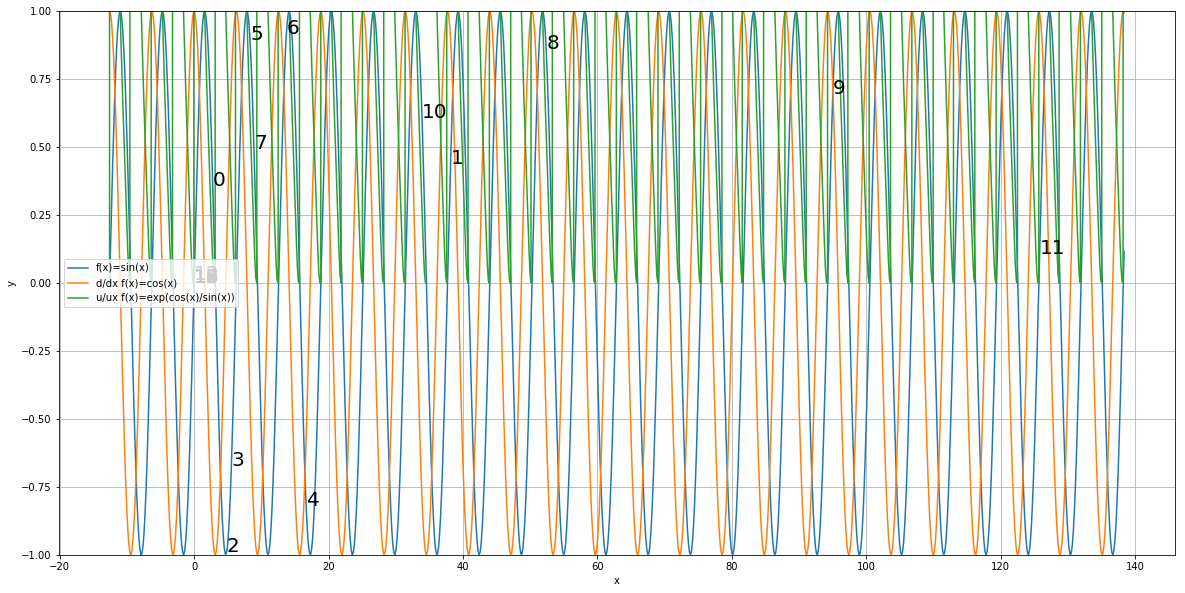

In [646]:
minimize(sin(x), 2.777, n=20, y_lim=(-1, 1))

Plotting function: sin(x) + 2
Plotting function: cos(x)
Plotting function: exp(cos(x)/(sin(x) + 2))
[(2.777, 0), (4.128129298515544, 1), (6.625515715453122, 2), (4.426595673737229, 3), (5.80407428882384, 4), (3.260733640627823, 5), (5.52772404206048, 6), (3.1769922278552363, 7), (5.283683345618377, 8), (3.3134864825102355, 9), (5.678598658036268, 10), (3.1963131599243573, 11), (5.340323872964469, 12), (3.2606417972654085, 13), (5.527458979850105, 14), (3.1770209669418756, 15), (5.283767699038476, 16), (3.3133973568685393, 17), (5.67834637018756, 18), (3.1962250867416926, 19), (5.340066026580321, 20), (3.260851233449316, 21), (5.528063407277091, 22), (3.1769557744024417, 23), (5.2835763490079595, 24), (3.313599578001145, 25), (5.678918783036256, 26), (3.1964251669389507, 27), (5.3406517839462415, 28), (3.2603758536721408, 29), (5.526691419299573, 30), (3.1771055106011628, 31), (5.2840158454308455, 32), (3.3131353557090057, 33), (5.6776046664591355, 34), (3.1959671739625244, 35), (5.3393

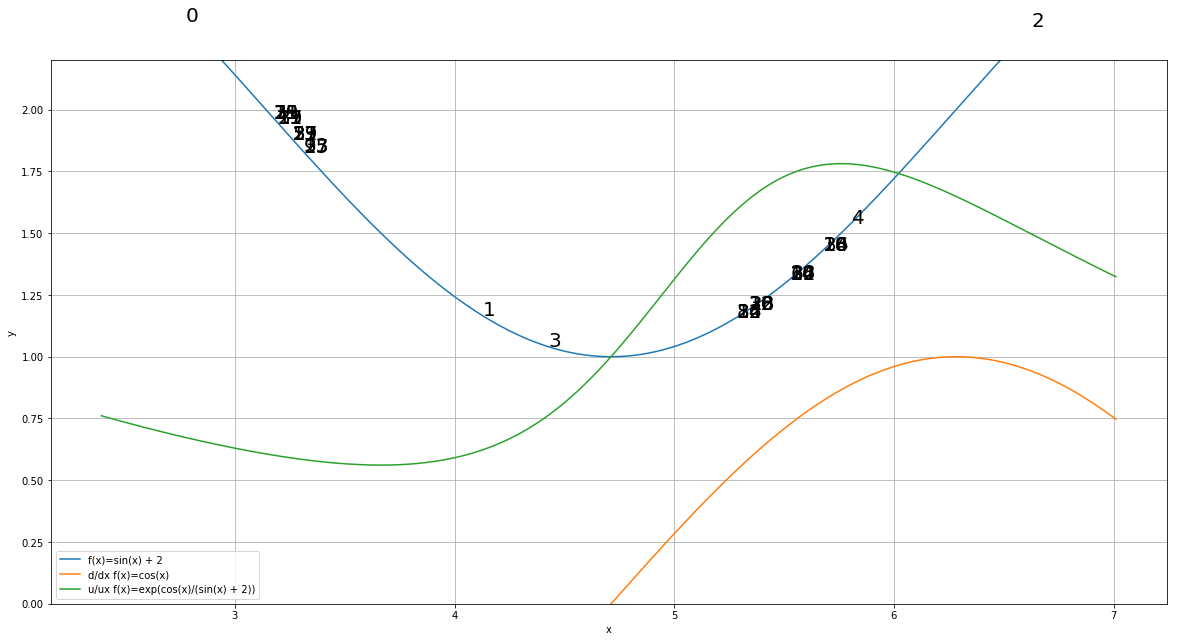

In [647]:
minimize(sin(x) + 2, 2.777, n=40, y_lim=(0, 2.2))

Plotting function: sin(x) + 2
Plotting function: cos(x)
Plotting function: exp(cos(x)/(sin(x) + 2))
[(-11.783000000000001, 0), (-12.047803438148623, 1), (-12.400898300952596, 2), (-12.865016500581318, 3), (-13.437691082014664, 4), (-13.969323061634011, 5), (-14.135040143935854, 6), (-14.13716709474966, 7), (-14.137166941154069, 8), (-14.137166941154069, 9), (-14.137166941154069, 10), (-14.137166941154069, 11), (-14.137166941154069, 12), (-14.137166941154069, 13), (-14.137166941154069, 14), (-14.137166941154069, 15), (-14.137166941154069, 16), (-14.137166941154069, 17), (-14.137166941154069, 18), (-14.137166941154069, 19), (-14.137166941154069, 20), (-14.137166941154069, 21), (-14.137166941154069, 22), (-14.137166941154069, 23), (-14.137166941154069, 24), (-14.137166941154069, 25), (-14.137166941154069, 26), (-14.137166941154069, 27), (-14.137166941154069, 28), (-14.137166941154069, 29), (-14.137166941154069, 30), (-14.137166941154069, 31), (-14.137166941154069, 32), (-14.13716694115406

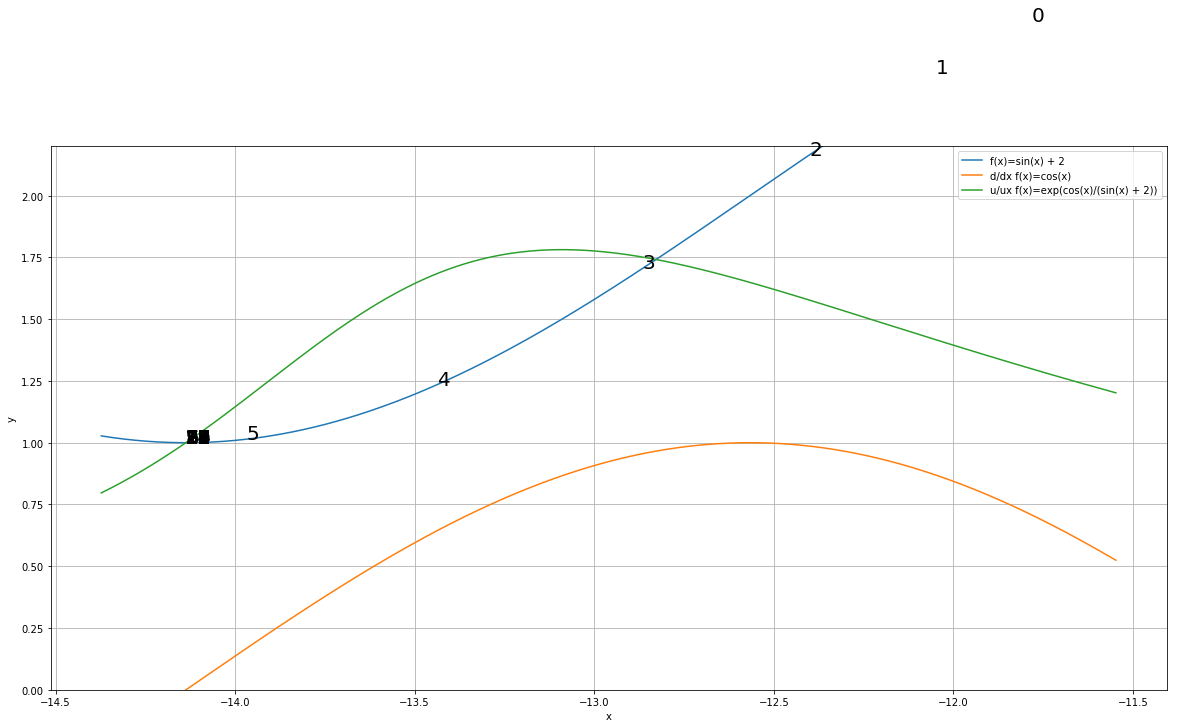

In [648]:
minimize(sin(x) + 2, 2.777 + -2*6.28-2, n=40, y_lim=(0, 2.2), learning_rate=lambda n, x_curr: 1 / x_curr)

<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/c/git/multiplicative_derivative/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
<string>:2: RuntimeWarning: overflow encountered in exp


Plotting function: x**4 - 2*x**3 + x**2 + x
Plotting function: 4*x**3 - 6*x**2 + 2*x + 1
Plotting function: exp((4*x**3 - 6*x**2 + 2*x + 1)/(x**4 - 2*x**3 + x**2 + x))
[(0.1, 0), (1.0952440141816537e-47, 1), (0.0, 2), (0.0, 3), (0.0, 4), (0.0, 5), (0.0, 6), (0.0, 7), (0.0, 8), (0.0, 9), (0.0, 10), (0.0, 11), (0.0, 12), (0.0, 13), (0.0, 14), (0.0, 15), (0.0, 16), (0.0, 17), (0.0, 18), (0.0, 19), (0.0, 20), (0.0, 21), (0.0, 22), (0.0, 23), (0.0, 24), (0.0, 25), (0.0, 26), (0.0, 27), (0.0, 28), (0.0, 29), (0.0, 30), (0.0, 31), (0.0, 32), (0.0, 33), (0.0, 34), (0.0, 35), (0.0, 36), (0.0, 37), (0.0, 38), (0.0, 39)]


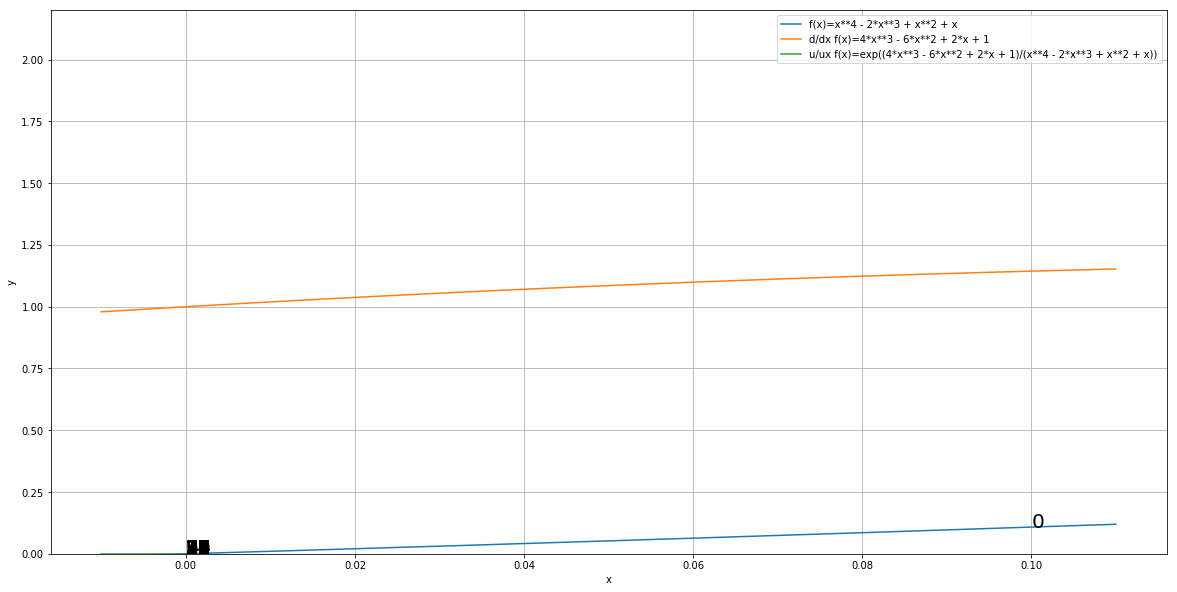

In [649]:
minimize(x**2 + x**4 - 2*x**3 + x, 0.1, n=40, y_lim=(0, 2.2), learning_rate=lambda n, x_curr: 1 / x_curr)

# Minimierungsverfahren

Schlussendlich kann man das Minimierungsverfahren vereinfacht wei folgt ausdrücken (gegeben den verwendeten Begriffen von https://www.overleaf.com/project/5c117d57d52ebe1d9027d3c1).

Gegeben sei $f(x)$ und ein Startpunkt $x_0$. Iterativ kann man nun wie folgt ein Minimum suchen:

$x_{i+1}\leftarrow x_i \frac{1}{\sqrt[x_i]{f^\cup (x_i)}}$

Ein offensichtlicher Nachteil ist, dass man nie aus dem psoitiven bzw. negativen Zahlenbereich ausbrechen kann. Eine Funktion muss auch immer positiv (oder negativ) sein. Durchschnitte mit der $x$-Achse funktionieren nicht. Das kann meist trivial umgangen werden, indem man $g(x)=f(x)+10$ setzt (bzw. für 10 eine entsprechend grosse Konstante setzt; meist sollte $1$ ok sein).

Man kann noch probieren über den normalisierten Input-Layer ein $\exp$ auszuführen, so sind die Einagben immer positiv. Jedes Neuron besteht dann aus einer solchen Funktion:

$n_i=b_i x_0^{w_{0,i}} x_1^{w_{1,i}} x_2^{w_{2,i}}$

oder wäre 

$n_i=\exp(b_i) x_0^{w_{0,i}} x_1^{w_{1,i}} x_2^{w_{2,i}}$

korrekter? Mal schauen. Oder:

$n_i=\exp(-b_i) x_0^{w_{0,i}} x_1^{w_{1,i}} x_2^{w_{2,i}}$

Denn sonst scheinen die Werte immer $>1$ zu sein, da die Gewichte immer $>0$ sind.

Fraglich ist auch noch, ob die $x_i$te Wurzel effektiv notwendig ist. Bei Unschönen Funktionien scheint dies der Fall zu sein, aber mal schauen wie es bei simplen Funktionen wie im neuronalen Netz hier ist.

**Update**:

bei Backpropagation muss man ja nach $x$ und nach $w$ ableiten. Man es ist nicht offensichtlich, ob man die vorherige Definition verwenden soll, oder so etwas:

$n_i=w_{0,i}^{x_0} w_{1,i}^{x_1} x_{2,i}^{x_2} b_i$

Dies scheint bezüglich dem Bias-Faktor sogar etwas natürlich zu sein.

<!--Somit ist es eigentlich sogar sehr gut, dass die Gewichte nie negativ werden können, denn das gäbe sehr sehr seltsames Zeugs. Initialisieren kann man sie auch mit einer durch $\exp$ geschmückten Normalverteilung.-->

# Neuronales Netz implementieren
Kann man versuchen. Die linearen Layer werden duch die vorher beschriebenen $n_i$-Layer ersetzt und $\mathrm{ReLU}=\max(0,x)$ durch $\mathrm{MeLU}(x)=\max(1, x)$. Ja, MeLU ist ein schlechter Name (was soll der überhaupt bedeuten?), aber lassen wir das mal so.

In [673]:
def listify(func):
    def listified_func(*args, **kwargs):
        if len(args) > 0 and isinstance(args[0], list):
            return [func(*((v,) + args[1:]), **kwargs) for v in args[0]]
        return func(*args, **kwargs)
    return listified_func

def to_float64(number):
    return np.array(number).astype(np.float64)

@listify
def MeLU(x):
    return Max(1., exp(x))

@listify
def MulDxMeLU(x):
    if x <= 1.:
        return 1.
    return exp(1.)

@listify
def sigmoid(x):
    return 1. / (1. + exp(-x))

def rand_weight():
    return exp(np.random.normal())

def bce(y_true, y_pred):
    return -(y_true * log(y_pred + 1e-15) + (1 - y_true) * log(1 - y_pred + 1e-15))

class Weights:
    def __init__(self, n, bias=True):
        self.weights = [rand_weight() for i in range(n)]
        self.bias = rand_weight() if bias else None
        
    def __repr__(self):
        return f'[{self.weights},bias={self.bias}]'

class Layer(ABC):

    @abstractmethod
    def forward(self, x):
        raise NotImplementedError

    @abstractmethod
    def backward(self, mul_dx):
        raise NotImplementedError
        
    @abstractmethod
    def dump(self, print_func):
        raise NotImplementedError


class FullyConnectedLayer(Layer):
    def __init__(self, n_inputs, n_outputs):
        self.__n_inputs = n_inputs
        self.__neurons = [Weights(n_inputs) for i in range(n_outputs)]
        self.__last_forward = None
        
    @staticmethod
    def __get_forward_weight_factor(x, w):
        return x ** w # versus: w ** x
    
    @staticmethod
    def __get_forward_bias_factor(b):
        return b
    
    @staticmethod
    def __get_backward_weight_factor(x, w):
        @lru_cache(maxsize=None)
        def backward_weight_f():
            x, w = symbols(['x', 'w'])
            fw = FullyConnectedLayer.__get_forward_weight_factor(x, w)
            return lambdify(mul_dx(fw, w), [x, w])
        return backward_weight_f()(x, w)
    
    @staticmethod
    def __get_backward_bias_factor(b):
        @lru_cache(maxsize=None)
        def backward_bias_f():
            b = symbols(['b'])
            fw = FullyConnectedLayer.__get_forward_bias_factor(b)
            return lambdify(mul_dx(fw, b), [b])
        return backward_bias_f()(b)
    
    @staticmethod
    def __get_backward_x_factor(x, w):
        @lru_cache(maxsize=None)
        def backward_x_f():
            x, w = symbols(['x', 'w'])
            fw = FullyConnectedLayer.__get_forward_weight_factor(x, w)
            return lambdify(mul_dx(fw, x), [x, w])
        return backward_x_f()(x, w)
        
    def __neuron_forward(self, neuron, x):
        result = 1.
        for i, weight in enumerate(neuron.weights):
            result *= self.__get_forward_weight_factor(x[i], weight)
        if neuron.bias is not None:
            result *= self.__get_forward_bias_factor(neuron.bias)
        return result
        
    def forward(self, x):
        self.__last_forward = {'x': x, 'y': [self.__neuron_forward(neuron, x) for neuron in self.__neurons]}
        return self.__last_forward['y']

    def backward(self, mul_dx):
        ux = [[] for _ in range(self.__n_inputs)]
        uw = [[] for _ in self.__neurons]
        for n_i, neuron in enumerate(self.__neurons):
            for w_i, weight in enumerate(neuron.weights):
                uw[n_i].append(...)
            if neuron.bias is not None:
                uw[n_i].append(...)
        raise NotImplementedError
    
    def dump(self, print_func):
        print_func('FullyConnectedLayer[')
        print_func(f'  Neurons:      {self.__neurons}')
        print_func(f'  Last Forward: {self.__last_forward}')
        print_func(']')


class FuncLayer(Layer):
    def __init__(self, f, c_mul_dx_f=None):
        x = symbols('x')
        self.__f = f
        self.__c_mul_dx_f = c_mul_dx_f or lambdify(x, mul_dx(self.__f(x), x), modules=['numpy'])
        self.__last_forward = None

    def forward(self, x):
        self.__last_forward = {'x': x, 'y': list(map(self.__f, x))}
        return self.__last_forward['y']

    def backward(self, mul_dx):
        
        # See formula (43) in https://www.overleaf.com/project/5c117d57d52ebe1d9027d3c1
        gx = list(map(to_float64, self.__last_forward['y']))
        mul_dx_gx = mul_dx
        
        mul_dx_fx = [self.__c_mul_dx_f(gx_i) ** (gx_i * log(mul_dx_gx[i])) for i, gx_i in enumerate(gx)]
        print(f'mul_dx_fx={mul_dx_fx}')
        return mul_dx_fx
    
    def dump(self, print_func):
        print_func('FuncLayer[')
        print_func(f'  f:            {self.__f}')
        print_func(f'  mul_dx_f:     {self.__c_mul_dx_f}')
        print_func(f'  Last Forward: {self.__last_forward}')
        print_func(']')
        
    
class LayerCollection(Layer):
    def __init__(self, *layers):
        self.__layers = list(layers)
        self.__last_forward = None

    def append(self, layer):
        self.__layers.append(layer)

    def extend(self, *layers):
        self.__layers.extend(layers)
        
    def forward(self, x):
        y = x
        for layer in self.__layers:
            y = layer.forward(y)
        self.__last_forward = {'x': x, 'y': y}
        return self.__last_forward['y']

    def backward(self, mul_dx):
        for layer in reversed(self.__layers):
            mul_dx = layer.backward(mul_dx)
        return mul_dx
    
    def dump(self, print_func):
        print_func('LayerCollection[')
        print_func(f'    Last Forward: {self.__last_forward}')
        for layer in self.__layers:
            layer.dump(lambda msg, *args, **kwargs: print_func(f'    {msg}', *args, **kwargs))
        print_func(']')

class Network:
    def __init__(self, loss_f, *layers):
        y_true, y_pred = symbols(['y_true', 'y_pred'])
        self.__loss_f = loss_f
        self.__c_mul_dx_f_loss = lambdify([y_true, y_pred], mul_dx(self.__loss_f(y_true, y_pred), y_pred), modules=['numpy'])
        self.__layers = LayerCollection(*layers)
        
    @property
    def layers(self):
        return self.__layers
    
    def train(self, x, y):
        pred = self.__layers.forward(x)
        loss = self.__loss_f(y, pred[0])
        mul_dx_loss = self.__c_mul_dx_f_loss(to_float64(y), to_float64(pred[0]))
        self.__layers.backward([mul_dx_loss])

        # TODO: compute derivative of loss_f with respect of pred[0]; then do the usual backprop
        print(f"Loss: {loss}")

def xor_data_generator(n=None):
    while True:
        if n is not None:
            if n == 0:
                break
            n -= 1
        input0 = random.randint(0, 1)
        input1 = random.randint(0, 1)
        output = (input0 + input1) % 2
        yield [input0, input1], output

In [674]:
nw = Network(bce)
nw.layers.extend(
    FuncLayer(exp),
    FullyConnectedLayer(2, 3),
    FuncLayer(MeLU, MulDxMeLU),
    FullyConnectedLayer(3, 2),
    FuncLayer(MeLU, MulDxMeLU),
    FullyConnectedLayer(2, 1),
    FuncLayer(log),
    FuncLayer(sigmoid)
)

In [695]:
fc = FullyConnectedLayer(2, 3)
MeLU(fc.forward([0.8, 2]))

[19.1728082164765, 1.45045821295289, 16.3398326723563]

In [696]:
nw.layers.forward([0.1, 0.2, 0.3])

[1.00000000000000]

In [697]:
#nw.layers.dump(print)

In [698]:
for x, y in xor_data_generator(15):
    print("X")
    nw.train(x, y)

X
mul_dx_fx=[nan]
mul_dx_fx=[nan]


<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: divide by zero encountered in log


NotImplementedError: 

In [575]:
fc = FullyConnectedLayer(1, 3)
fc.forward([1.1])
fc.dump(print)

FullyConnectedLayer[
  Neurons:      [[[0.738075378760244],bias=0.773380522836231], [[1.66284224914172],bias=1.83352258161247], [[1.04430015074895],bias=2.11010281112535]]
  Last Forward: {'x': [1.1], 'y': [0.829744060254363, 2.14840309215068, 2.33093414327285]}
]
